In [1]:
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append(str(Path(".").resolve().parent.parent))

In [4]:
from berp.datasets import NaturalLanguageStimulus
from berp.languages.english import CMUPhonemizer

In [63]:
stimulus_path = "./old-man-and-the-sea/run1.pkl"

data_consonants = "../../workflow/heilbron2022/data/confusion_cutler2004/consonants.xls"
data_vowels = "../../workflow/heilbron2022/data/confusion_cutler2004/vowels.xls"

output_path = "confusion.npz"

## Load and preprocess experimental confusion data

In [64]:
# Map from "stimulus" column to IPA representation. Induced from tables 1 and 2 of Cutler et al 2004.
# NB they don't actually map the table ordering .. but we can figure this out
# Also double-checked (e.g. 14j) by listening to waveforms
ipa_mapping = {
    "01p": "p",
    "02b": "b",
    "03t": "t",
    "04d": "d",
    "05k": "k",
    "06g": "g",
    "07f": "f",
    "08v": "v",
    "09th": "θ",
    "10dth": "ð",
    "11s": "s",
    "12z": "z",
    "13sh": "ʃ",
    "14h": "h",
    "14j": "ʒ",
    "15ch": "tʃ",
    "16dj": "dʒ",
    "17m": "m",
    "18n": "n",
    "19ng": "ŋ",
    "19y": "j",
    "20l": "l",
    "21r": "ɹ",
    "22w": "w",
    
    "01i": "ɪ",
    "02ii": "i",
    "03ei": "ɛɪ",
    "04ai": "aɪ",
    "05oi": "ɔɪ",
    "06e": "ɛ",
    "07a": "æ",
    "08sr": "ɚ",
    "09u": "ʊ",
    "10uu": "u",
    "11au": "aʊ",
    "12ou": "oʊ",
    "13oo": "ɑ",
    "14uh": "ʌ",
    "15o": "ɔ",
    # NB no schwa!
    
    # Special annotations for missed consonant / vowel
    "23miss": "_",
    "16miss": "_",
}

### Consonants

In [65]:
consonant_df = pd.read_excel(data_consonants, sheet_name=1)
consonant_df["stimulus"] = consonant_df.stimulus.map(ipa_mapping)
consonant_df["answer"] = consonant_df.answer.map(ipa_mapping)

In [66]:
consonant_df

,subject,answer,syllable,stimulus,vowel/cons,init/final,signalnoise,language
0,w1,b,doi,d,c,cv,0,AE
1,w1,w,ru,ɹ,c,cv,0,AE
2,w1,w,bu,b,c,cv,0,AE
3,w1,θ,hi,h,c,cv,0,AE
4,w1,t,choi,tʃ,c,cv,0,AE
...,...,...,...,...,...,...,...,...
30955,z4,ʒ,iij,ʒ,c,vc,16,AE
30956,z4,d,aud,d,c,vc,16,AE
30957,z4,ð,oidth,ð,c,vc,16,AE
30958,z4,_,ul,l,c,vc,16,AE


In [67]:
consonant_pivot = consonant_df.pivot_table("signalnoise", "answer", "stimulus", aggfunc="count")
consonant_pivot

stimulus,b,d,dʒ,f,g,h,j,k,l,m,...,tʃ,v,w,z,ð,ŋ,ɹ,ʃ,ʒ,θ
answer,,,,,,,,,,,,,,,,,,,,,
_,46.0,15.0,2.0,27.0,23.0,21.0,6.0,17.0,19.0,8.0,...,2.0,29.0,7.0,13.0,16.0,6.0,9.0,3.0,3.0,31.0
b,712.0,44.0,5.0,35.0,44.0,36.0,8.0,7.0,13.0,19.0,...,1.0,135.0,19.0,7.0,77.0,1.0,16.0,NaN,NaN,31.0
d,40.0,928.0,26.0,7.0,35.0,2.0,13.0,3.0,12.0,6.0,...,NaN,22.0,NaN,29.0,116.0,7.0,3.0,NaN,6.0,9.0
dʒ,7.0,27.0,1142.0,2.0,13.0,2.0,7.0,1.0,1.0,2.0,...,32.0,6.0,NaN,17.0,27.0,NaN,3.0,4.0,132.0,NaN
f,57.0,15.0,1.0,831.0,19.0,42.0,NaN,8.0,42.0,9.0,...,4.0,94.0,NaN,NaN,19.0,2.0,7.0,NaN,1.0,355.0
g,129.0,35.0,57.0,6.0,947.0,4.0,9.0,15.0,9.0,10.0,...,1.0,42.0,2.0,10.0,31.0,53.0,10.0,1.0,4.0,5.0
h,85.0,14.0,3.0,44.0,38.0,428.0,8.0,117.0,2.0,8.0,...,1.0,35.0,6.0,2.0,6.0,NaN,17.0,NaN,NaN,37.0
j,23.0,18.0,2.0,5.0,73.0,1.0,620.0,1.0,5.0,2.0,...,1.0,5.0,22.0,2.0,3.0,NaN,NaN,NaN,NaN,1.0
k,14.0,1.0,1.0,30.0,16.0,23.0,NaN,1048.0,4.0,1.0,...,10.0,5.0,NaN,NaN,NaN,1.0,4.0,1.0,NaN,33.0


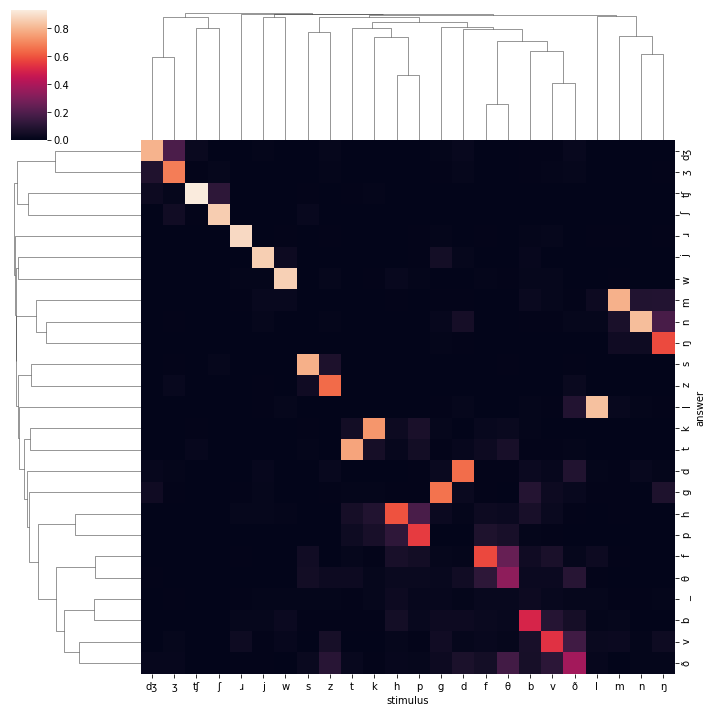

In [68]:
consonant_pivot_normed = consonant_pivot.fillna(0) / consonant_pivot.sum(axis=0)
sns.clustermap(consonant_pivot_normed, metric="cosine")

### Vowels

In [69]:
vowel_df = pd.read_excel(data_vowels, sheet_name=1)
vowel_df["stimulus"] = vowel_df.stimulus.map(ipa_mapping)
vowel_df["answer"] = vowel_df.answer.map(ipa_mapping)

In [70]:
vowel_df

,subject,answer,syllable,stimulus,vowel/cons,init/final,signalnoise,language
0,w1,i,gii,i,v,cv,0,AE
1,w1,ɛɪ,wei,ɛɪ,v,cv,0,AE
2,w1,ɔɪ,hoi,ɔɪ,v,cv,0,AE
3,w1,æ,tha,æ,v,cv,0,AE
4,w1,ɔɪ,yoi,ɔɪ,v,cv,0,AE
...,...,...,...,...,...,...,...,...
30955,z4,aʊ,aush,aʊ,v,vc,16,AE
30956,z4,ɔ,ong,ɔ,v,vc,16,AE
30957,z4,ɛ,ez,ɛ,v,vc,16,AE
30958,z4,i,iik,i,v,vc,16,AE


In [71]:
vowel_pivot = vowel_df.pivot_table("signalnoise", "answer", "stimulus", aggfunc="count")
vowel_pivot

stimulus,aɪ,aʊ,i,oʊ,u,æ,ɑ,ɔ,ɔɪ,ɚ,ɛ,ɛɪ,ɪ,ʊ,ʌ
answer,,,,,,,,,,,,,,,
_,9.0,28.0,16.0,19.0,39.0,26.0,38.0,56.0,6.0,4.0,29.0,13.0,24.0,61.0,30.0
aɪ,1857.0,NaN,11.0,2.0,7.0,3.0,4.0,8.0,3.0,2.0,5.0,6.0,9.0,9.0,8.0
aʊ,1.0,1738.0,1.0,50.0,44.0,35.0,28.0,19.0,41.0,NaN,2.0,1.0,1.0,30.0,33.0
i,2.0,2.0,1832.0,1.0,27.0,3.0,1.0,NaN,1.0,8.0,14.0,52.0,29.0,1.0,1.0
oʊ,1.0,81.0,NaN,1790.0,19.0,1.0,28.0,12.0,21.0,NaN,NaN,1.0,1.0,26.0,14.0
u,NaN,8.0,12.0,52.0,1574.0,1.0,2.0,NaN,6.0,NaN,NaN,1.0,7.0,91.0,2.0
æ,1.0,13.0,NaN,NaN,NaN,1705.0,56.0,214.0,NaN,NaN,148.0,69.0,4.0,1.0,96.0
ɑ,2.0,82.0,2.0,8.0,11.0,19.0,1199.0,564.0,10.0,1.0,14.0,2.0,3.0,29.0,208.0
ɔ,3.0,38.0,NaN,44.0,9.0,4.0,591.0,771.0,3.0,NaN,1.0,NaN,1.0,43.0,285.0


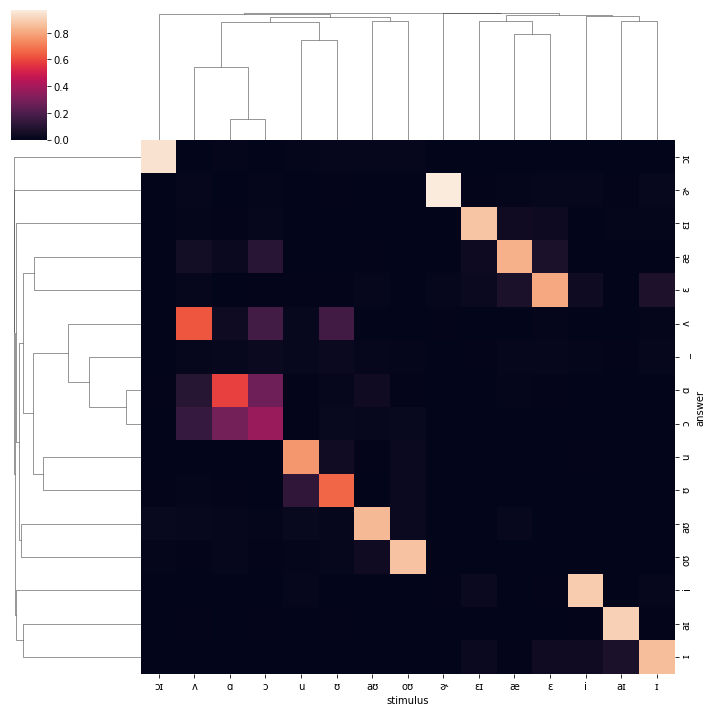

In [96]:
vowel_pivot_normed = vowel_pivot.fillna(0) / vowel_pivot.sum(axis=0)
sns.clustermap(vowel_pivot_normed, metric="cosine")

## Join

In [160]:
confusion_df = pd.concat([consonant_df, vowel_df]).pivot_table("signalnoise", "answer", "stimulus", aggfunc="count")

### Insert schwa

This confusion data doesn't include schwa /ə/. Pretend that /ə/ has confusion patterns related to phonetically close elements.

In [161]:
assert "ə" not in confusion_df.index
assert "ə" not in confusion_df.columns

source_phonemes = ["ʌ", "ɚ", "ʊ"]

In [162]:
confusion_df_adjusted = confusion_df.copy()

In [163]:
# Add row
source_rows = confusion_df.loc[source_phonemes][:]
for phon in source_phonemes:
    source_rows.loc[phon, phon] = np.nan
confusion_df_adjusted.loc["ə"] = source_rows.median(axis=0)

In [164]:
# Add column
source_cols = confusion_df[source_phonemes][:]
for phon in source_phonemes:
    source_cols.loc[phon, phon] = np.nan
confusion_df_adjusted["ə"] = source_cols.median(axis=1)

In [165]:
# Add diagonal
confusion_df_adjusted.loc["ə", "ə"] = np.median([confusion_df.loc[phon, phon] for phon in source_phonemes])

In [166]:
confusion_df_adjusted

stimulus,aɪ,aʊ,b,d,dʒ,f,g,h,i,j,...,ɛ,ɛɪ,ɪ,ɹ,ʃ,ʊ,ʌ,ʒ,θ,ə
answer,,,,,,,,,,,,,,,,,,,,,
_,9.0,28.0,46.0,15.0,2.0,27.0,23.0,21.0,16.0,6.0,...,29.0,13.0,24.0,9.0,3.0,61.0,30.0,3.0,31.0,30.0
aɪ,1857.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,...,5.0,6.0,9.0,NaN,NaN,9.0,8.0,NaN,NaN,8.0
aʊ,1.0,1738.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,2.0,1.0,1.0,NaN,NaN,30.0,33.0,NaN,NaN,31.5
b,NaN,NaN,712.0,44.0,5.0,35.0,44.0,36.0,NaN,8.0,...,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,31.0,NaN
d,NaN,NaN,40.0,928.0,26.0,7.0,35.0,2.0,NaN,13.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,6.0,9.0,NaN
dʒ,NaN,NaN,7.0,27.0,1142.0,2.0,13.0,2.0,NaN,7.0,...,NaN,NaN,NaN,3.0,4.0,NaN,NaN,132.0,NaN,NaN
f,NaN,NaN,57.0,15.0,1.0,831.0,19.0,42.0,NaN,NaN,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,1.0,355.0,NaN
g,NaN,NaN,129.0,35.0,57.0,6.0,947.0,4.0,NaN,9.0,...,NaN,NaN,NaN,10.0,1.0,NaN,NaN,4.0,5.0,NaN
h,NaN,NaN,85.0,14.0,3.0,44.0,38.0,428.0,NaN,8.0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,37.0,NaN


### Insert padding phoneme

In [169]:
PAD_PHONEME = "_"
# Compute mean frequency along diagonal. NB we reindex confusion_df to make sure the diagonal is meaningful
diag_mean = np.nanmean(np.diag(confusion_df.loc[confusion_df.columns]))
assert np.isfinite(diag_mean)
confusion_df[PAD_PHONEME] = np.nanmean(confusion_df)
confusion_df.loc[PAD_PHONEME, PAD_PHONEME] = diag_mean

In [170]:
confusion_df

stimulus,aɪ,aʊ,b,d,dʒ,f,g,h,i,j,...,ɛ,ɛɪ,ɪ,ɹ,ʃ,ʊ,ʌ,ʒ,θ,_
answer,,,,,,,,,,,,,,,,,,,,,
_,9.0,28.0,46.0,15.0,2.0,27.0,23.0,21.0,16.0,6.0,...,29.0,13.0,24.0,9.0,3.0,61.0,30.0,3.0,31.0,1168.102564
aɪ,1857.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,...,5.0,6.0,9.0,NaN,NaN,9.0,8.0,NaN,NaN,89.479769
aʊ,1.0,1738.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,2.0,1.0,1.0,NaN,NaN,30.0,33.0,NaN,NaN,89.479769
b,NaN,NaN,712.0,44.0,5.0,35.0,44.0,36.0,NaN,8.0,...,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,31.0,89.479769
d,NaN,NaN,40.0,928.0,26.0,7.0,35.0,2.0,NaN,13.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,6.0,9.0,89.479769
dʒ,NaN,NaN,7.0,27.0,1142.0,2.0,13.0,2.0,NaN,7.0,...,NaN,NaN,NaN,3.0,4.0,NaN,NaN,132.0,NaN,89.479769
f,NaN,NaN,57.0,15.0,1.0,831.0,19.0,42.0,NaN,NaN,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,1.0,355.0,89.479769
g,NaN,NaN,129.0,35.0,57.0,6.0,947.0,4.0,NaN,9.0,...,NaN,NaN,NaN,10.0,1.0,NaN,NaN,4.0,5.0,89.479769
h,NaN,NaN,85.0,14.0,3.0,44.0,38.0,428.0,NaN,8.0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,37.0,89.479769


### Clean up

In [171]:
assert set(confusion_df.index) == set(confusion_df.columns)

In [172]:
confusion_df = confusion_df[confusion_df.index]

In [173]:
assert confusion_df.index.tolist() == confusion_df.columns.tolist()

### Plot

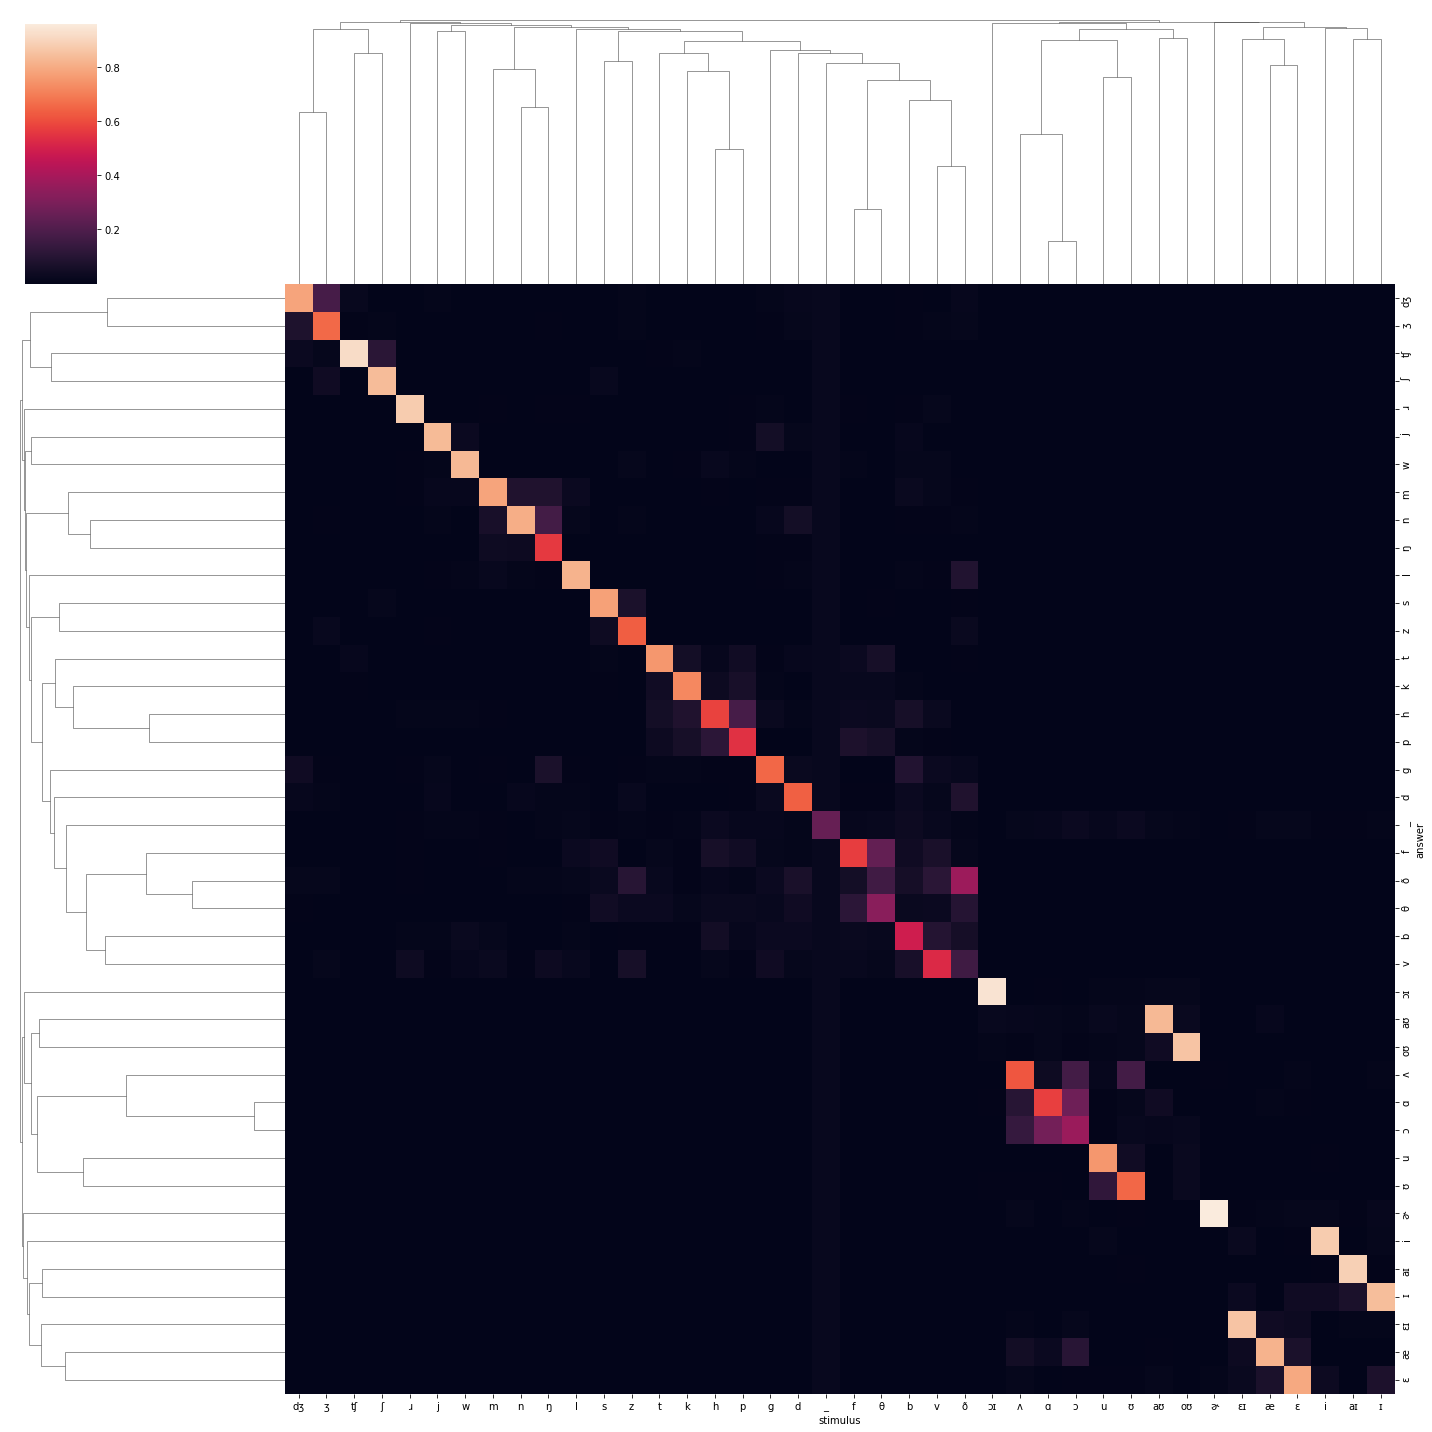

In [174]:
confusion_df_norm = confusion_df.fillna(1) / confusion_df.fillna(1).sum(axis=0)
sns.clustermap(confusion_df_norm, metric="cosine", figsize=(20, 20))

## Check mapping with stimulus data

In [175]:
with open(stimulus_path, "rb") as f:
    stim = pickle.load(f)

In [176]:
stim.phonemes

['ð',
 'ŋ',
 'p',
 'ɪ',
 'f',
 'tʃ',
 'n',
 'dʒ',
 'ʃ',
 'd',
 's',
 'ɹ',
 'ɛɪ',
 'ɔɪ',
 't',
 'oʊ',
 'ɔ',
 'ɑ',
 'θ',
 'l',
 'k',
 'ʊ',
 'ʌ',
 'b',
 'i',
 'j',
 'v',
 'ɛ',
 'aɪ',
 'm',
 'w',
 'h',
 'æ',
 'ʒ',
 'g',
 'aʊ',
 'ɚ',
 'u',
 'z',
 '_']

In [177]:
assert set(stim.phonemes) == set(confusion_df_norm.index)

In [178]:
# Reorder according to stim phonemes. Don't think this is necessary but I'm superstitious

In [179]:
confusion_df_norm = confusion_df_norm.loc[stim.phonemes]

In [180]:
confusion_df_norm = confusion_df_norm[stim.phonemes]

In [181]:
assert confusion_df_norm.index.tolist() == confusion_df_norm.columns.tolist()

In [182]:
confusion_df_norm

stimulus,ð,ŋ,p,ɪ,f,tʃ,n,dʒ,ʃ,d,...,w,h,æ,ʒ,g,aʊ,ɚ,u,z,_
answer,,,,,,,,,,,,,,,,,,,,,
ð,0.372684,0.008065,0.011644,0.000479,0.049451,0.003415,0.008208,0.015100,0.001362,0.066621,...,0.001340,0.016238,0.000479,0.014785,0.028846,0.000478,0.000477,0.000479,0.098765,0.019211
ŋ,0.001373,0.561828,0.000685,0.000479,0.000687,0.000683,0.032832,0.000686,0.000681,0.004808,...,0.001340,0.001353,0.000479,0.001344,0.007555,0.000478,0.000477,0.000479,0.000686,0.019211
p,0.000686,0.001344,0.542466,0.000479,0.072802,0.000683,0.000684,0.001373,0.000681,0.001374,...,0.002681,0.112314,0.000479,0.001344,0.003434,0.000478,0.000477,0.000479,0.000686,0.019211
ɪ,0.000686,0.001344,0.000685,0.843391,0.000687,0.000683,0.000684,0.000686,0.000681,0.000687,...,0.001340,0.001353,0.003830,0.001344,0.000687,0.000478,0.003341,0.002872,0.000686,0.019211
f,0.013040,0.002688,0.043836,0.000479,0.570742,0.002732,0.000684,0.000686,0.000681,0.010302,...,0.001340,0.056834,0.000479,0.001344,0.013049,0.000478,0.000477,0.000479,0.000686,0.019211
tʃ,0.001373,0.001344,0.000685,0.000479,0.000687,0.915301,0.000684,0.028826,0.108311,0.001374,...,0.001340,0.001353,0.000479,0.012097,0.001374,0.000478,0.000477,0.000479,0.000686,0.019211
n,0.010981,0.169355,0.000685,0.000479,0.000687,0.000683,0.806430,0.000686,0.000681,0.050824,...,0.002681,0.002706,0.000479,0.005376,0.017170,0.000478,0.000477,0.000479,0.009602,0.019211
dʒ,0.018531,0.001344,0.002055,0.000479,0.001374,0.021858,0.001368,0.783802,0.002725,0.018544,...,0.001340,0.002706,0.000479,0.177419,0.008929,0.000478,0.000477,0.000479,0.011660,0.019211
ʃ,0.000686,0.001344,0.000685,0.000479,0.002747,0.004098,0.000684,0.000686,0.839237,0.000687,...,0.001340,0.001353,0.000479,0.040323,0.000687,0.000478,0.000477,0.000479,0.000686,0.019211


In [184]:
np.savez(output_path, confusion=confusion_df_norm.values, phonemes=confusion_df_norm.index.tolist())